<a href="https://colab.research.google.com/github/Keshavj022/Fruit_classification_model/blob/main/Fruit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100% 1.28G/1.28G [00:11<00:00, 170MB/s]
100% 1.28G/1.28G [00:11<00:00, 118MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/fruits.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset Sucessfully extracted")

Dataset Sucessfully extracted


In [5]:
import os
path, dirs, files = next(os.walk('/content/fruits-360_dataset/fruits-360/Training'))
file_count = len(files)
print("Number of images in training dataset are: ", file_count)

Number of images in training dataset are:  0


In [6]:
base_dir = '/content/fruits-360_dataset/fruits-360'
train_dir = os.path.join(base_dir,  'Training')
test_dir = os.path.join(base_dir, 'Test')
for dirpath, dirnames, filenames in os.walk(train_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 131 directories and 0 images in '/content/fruits-360_dataset/fruits-360/Training'.
There are 0 directories and 492 images in '/content/fruits-360_dataset/fruits-360/Training/Apricot'.
There are 0 directories and 534 images in '/content/fruits-360_dataset/fruits-360/Training/Nut Pecan'.
There are 0 directories and 492 images in '/content/fruits-360_dataset/fruits-360/Training/Grape White 3'.
There are 0 directories and 459 images in '/content/fruits-360_dataset/fruits-360/Training/Tomato Yellow'.
There are 0 directories and 666 images in '/content/fruits-360_dataset/fruits-360/Training/Pear Red'.
There are 0 directories and 490 images in '/content/fruits-360_dataset/fruits-360/Training/Pitahaya Red'.
There are 0 directories and 490 images in '/content/fruits-360_dataset/fruits-360/Training/Guava'.
There are 0 directories and 738 images in '/content/fruits-360_dataset/fruits-360/Training/Cherry Rainier'.
There are 0 directories and 492 images in '/content/fruits-360_dataset/fru

In [7]:
import pandas as pd

In [8]:
base_dir = '/content/fruits-360_dataset/fruits-360'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Test')

def create_dataframe(data_path):
    df = []
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            if f_path.endswith('jpg'):
                df.append([f_path, c])
    return pd.DataFrame(df, columns=('filename', 'class'))

classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
df_train = create_dataframe(train_dir)
df_test = create_dataframe(validation_dir)

In [9]:
df_train, df_test

(                                                filename    class
 0      /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
 1      /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
 2      /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
 3      /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
 4      /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
 ...                                                  ...      ...
 67687  /content/fruits-360_dataset/fruits-360/Trainin...     Kiwi
 67688  /content/fruits-360_dataset/fruits-360/Trainin...     Kiwi
 67689  /content/fruits-360_dataset/fruits-360/Trainin...     Kiwi
 67690  /content/fruits-360_dataset/fruits-360/Trainin...     Kiwi
 67691  /content/fruits-360_dataset/fruits-360/Trainin...     Kiwi
 
 [67692 rows x 2 columns],
                                                 filename    class
 0      /content/fruits-360_dataset/fruits-360/Test/Ap...  Apricot
 1      /content/fruits-360_datas

In [10]:
df_train.head()

filename    class
0  /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
1  /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
2  /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
3  /content/fruits-360_dataset/fruits-360/Trainin...  Apricot
4  /content/fruits-360_dataset/fruits-360/Trainin...  Apricot

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [12]:
df_train, df_val = train_test_split(df_train, test_size=0.3, random_state = 4)

In [13]:
df_train, df_val

(                                                filename           class
 64213  /content/fruits-360_dataset/fruits-360/Trainin...  Nectarine Flat
 51126  /content/fruits-360_dataset/fruits-360/Trainin...        Physalis
 26984  /content/fruits-360_dataset/fruits-360/Trainin...        Cherry 1
 14824  /content/fruits-360_dataset/fruits-360/Trainin...        Tomato 3
 58220  /content/fruits-360_dataset/fruits-360/Trainin...     Huckleberry
 ...                                                  ...             ...
 46393  /content/fruits-360_dataset/fruits-360/Trainin...       Pineapple
 20062  /content/fruits-360_dataset/fruits-360/Trainin...    Pear Forelle
 65276  /content/fruits-360_dataset/fruits-360/Trainin...       Carambula
 23346  /content/fruits-360_dataset/fruits-360/Trainin...    Tomato Heart
 11863  /content/fruits-360_dataset/fruits-360/Trainin...    Pear Monster
 
 [47384 rows x 2 columns],
                                                 filename               class
 2587

In [14]:
def count_images(directory):
  total_images = 0
  for roots, dir, files in os.walk(directory):
    for file in files:
      if file.endswith('jpg') or file.endswith('png'):
        total_images += 1
  return total_images

In [15]:
df_train_count = count_images(train_dir)
df_test_count = count_images(test_dir)
print("Number of images in train directory = ", df_train_count)
print("Number of images in test directory = ", df_test_count)

Number of images in train directory =  67692
Number of images in test directory =  22688


In [16]:
import glob as gb

In [17]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 'Maracuja' 'Melon Piel de Sapo' 'Mulberry' 'Nectarine'
 'Nectarine Flat

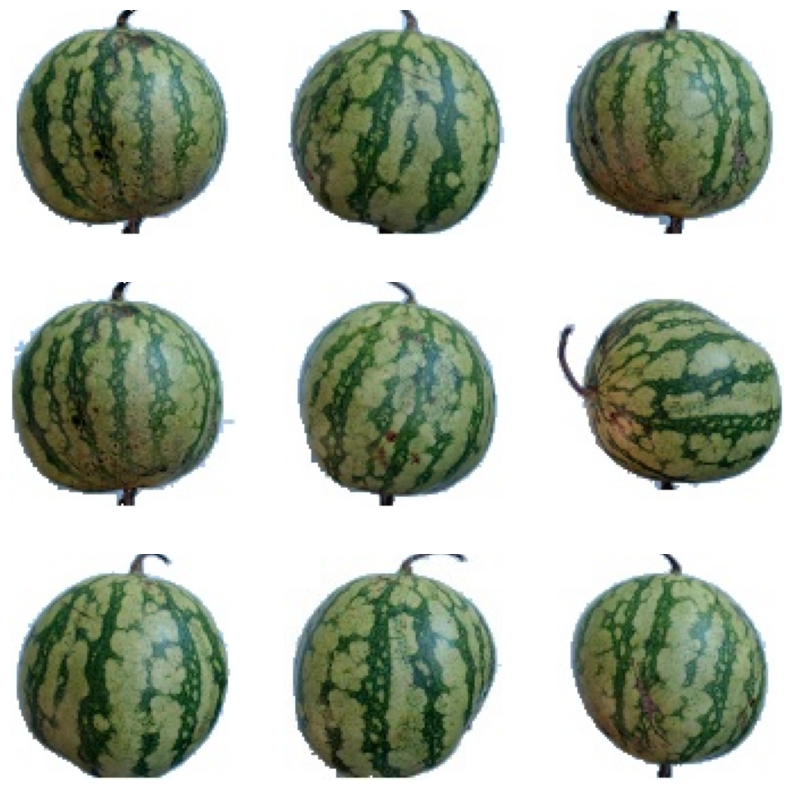

In [18]:
import PIL
fruits = list(data_dir.glob('Watermelon/*.jpg'))
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [19]:
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

In [20]:
train_class_count = count_images_per_class(train_dir)
sorted_class_counts = dict(sorted(train_class_count.items(), key=lambda item: item[1]))
top_10_classes = dict(list(sorted_class_counts.items())[-10:])
bottom_10_classes = dict(list(sorted_class_counts.items())[:10])
print("Top 10 classes:", list(top_10_classes.keys()))
print("Bottom 10 classes:", list(bottom_10_classes.keys()))

Top 10 classes: ['Walnut', 'Cherry Rainier', 'Tomato 3', 'Peach 2', 'Melon Piel de Sapo', 'Tomato 1', 'Cherry 2', 'Strawberry Wedge', 'Plum 3', 'Grape Blue']
Bottom 10 classes: ['Ginger Root', 'Pear Kaiser', 'Mangostan', 'Tomato Maroon', 'Cucumber Ripe', 'Plum 2', 'Mango Red', 'Avocado', 'Apple Red 3', 'Onion White']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Walnut'),
  Text(1, 0, 'Cherry Rainier'),
  Text(2, 0, 'Tomato 3'),
  Text(3, 0, 'Peach 2'),
  Text(4, 0, 'Melon Piel de Sapo'),
  Text(5, 0, 'Tomato 1'),
  Text(6, 0, 'Cherry 2'),
  Text(7, 0, 'Strawberry Wedge'),
  Text(8, 0, 'Plum 3'),
  Text(9, 0, 'Grape Blue')])

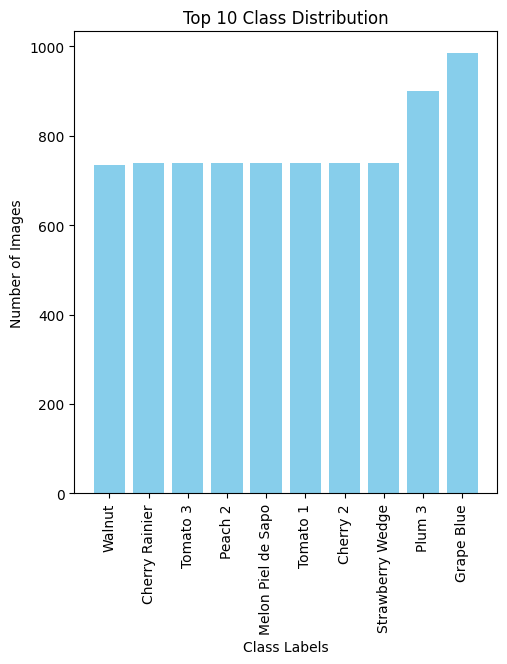

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_classes.keys(), top_10_classes.values(), color='skyblue')
plt.title('Top 10 Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ginger Root'),
  Text(1, 0, 'Pear Kaiser'),
  Text(2, 0, 'Mangostan'),
  Text(3, 0, 'Tomato Maroon'),
  Text(4, 0, 'Cucumber Ripe'),
  Text(5, 0, 'Plum 2'),
  Text(6, 0, 'Mango Red'),
  Text(7, 0, 'Avocado'),
  Text(8, 0, 'Apple Red 3'),
  Text(9, 0, 'Onion White')])

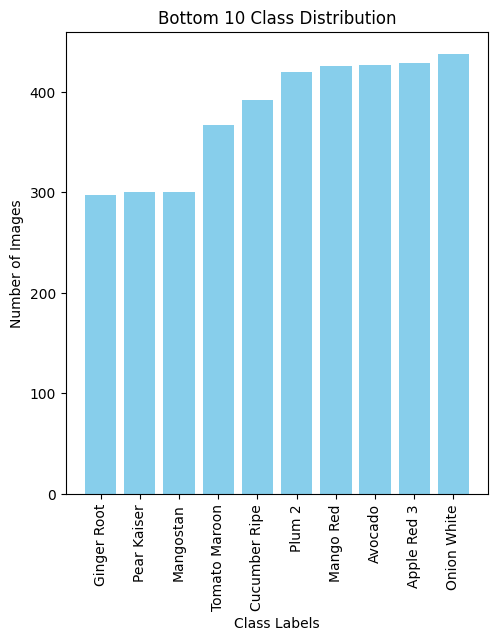

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bottom_10_classes.keys(), bottom_10_classes.values(), color='skyblue')
plt.title('Bottom 10 Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)

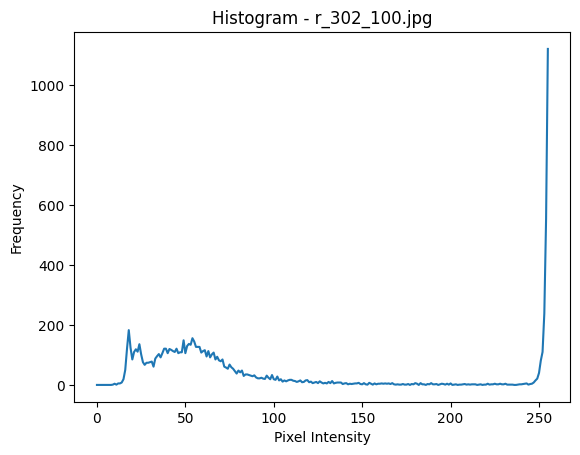

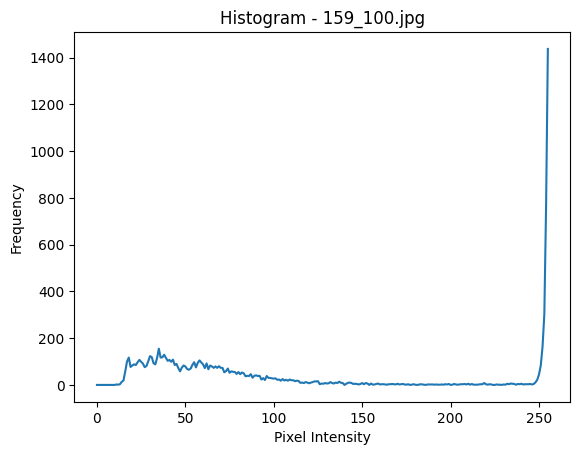

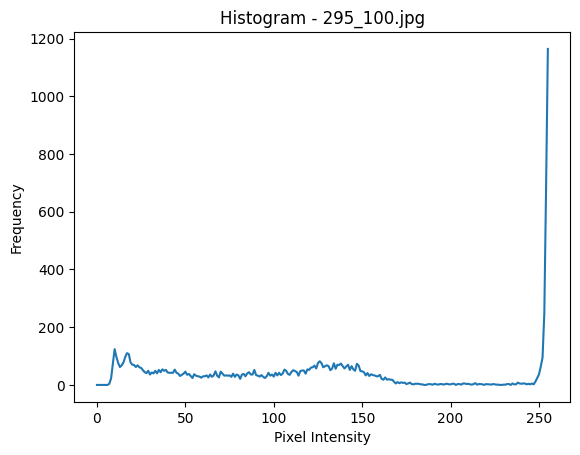

In [23]:
import cv2
selected_image_paths = np.random.choice(list(data_dir.glob("Apple Braeburn/*.jpg")), 3, replace=False)
for image_path in selected_image_paths:
    image = cv2.imread(str(image_path))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    plt.figure()
    plt.title('Histogram - {}'.format(image_path.name))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.plot(hist)
    plt.show()

In [24]:
size = []
for folder in os.listdir(os.path.join(data_dir)):
    files = gb.glob(os.path.join(data_dir, folder, '*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
size_counts = pd.Series(size).value_counts()
print(size_counts)
most_common_size = size_counts.idxmax()
print("Most common size:", most_common_size)

(100, 100, 3)    67692
Name: count, dtype: int64
Most common size: (100, 100, 3)


In [34]:
import random
def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(target_folder))
    img = mpimg.imread(os.path.join(target_folder, random_image))

    return img
rows = 20
cols = 7

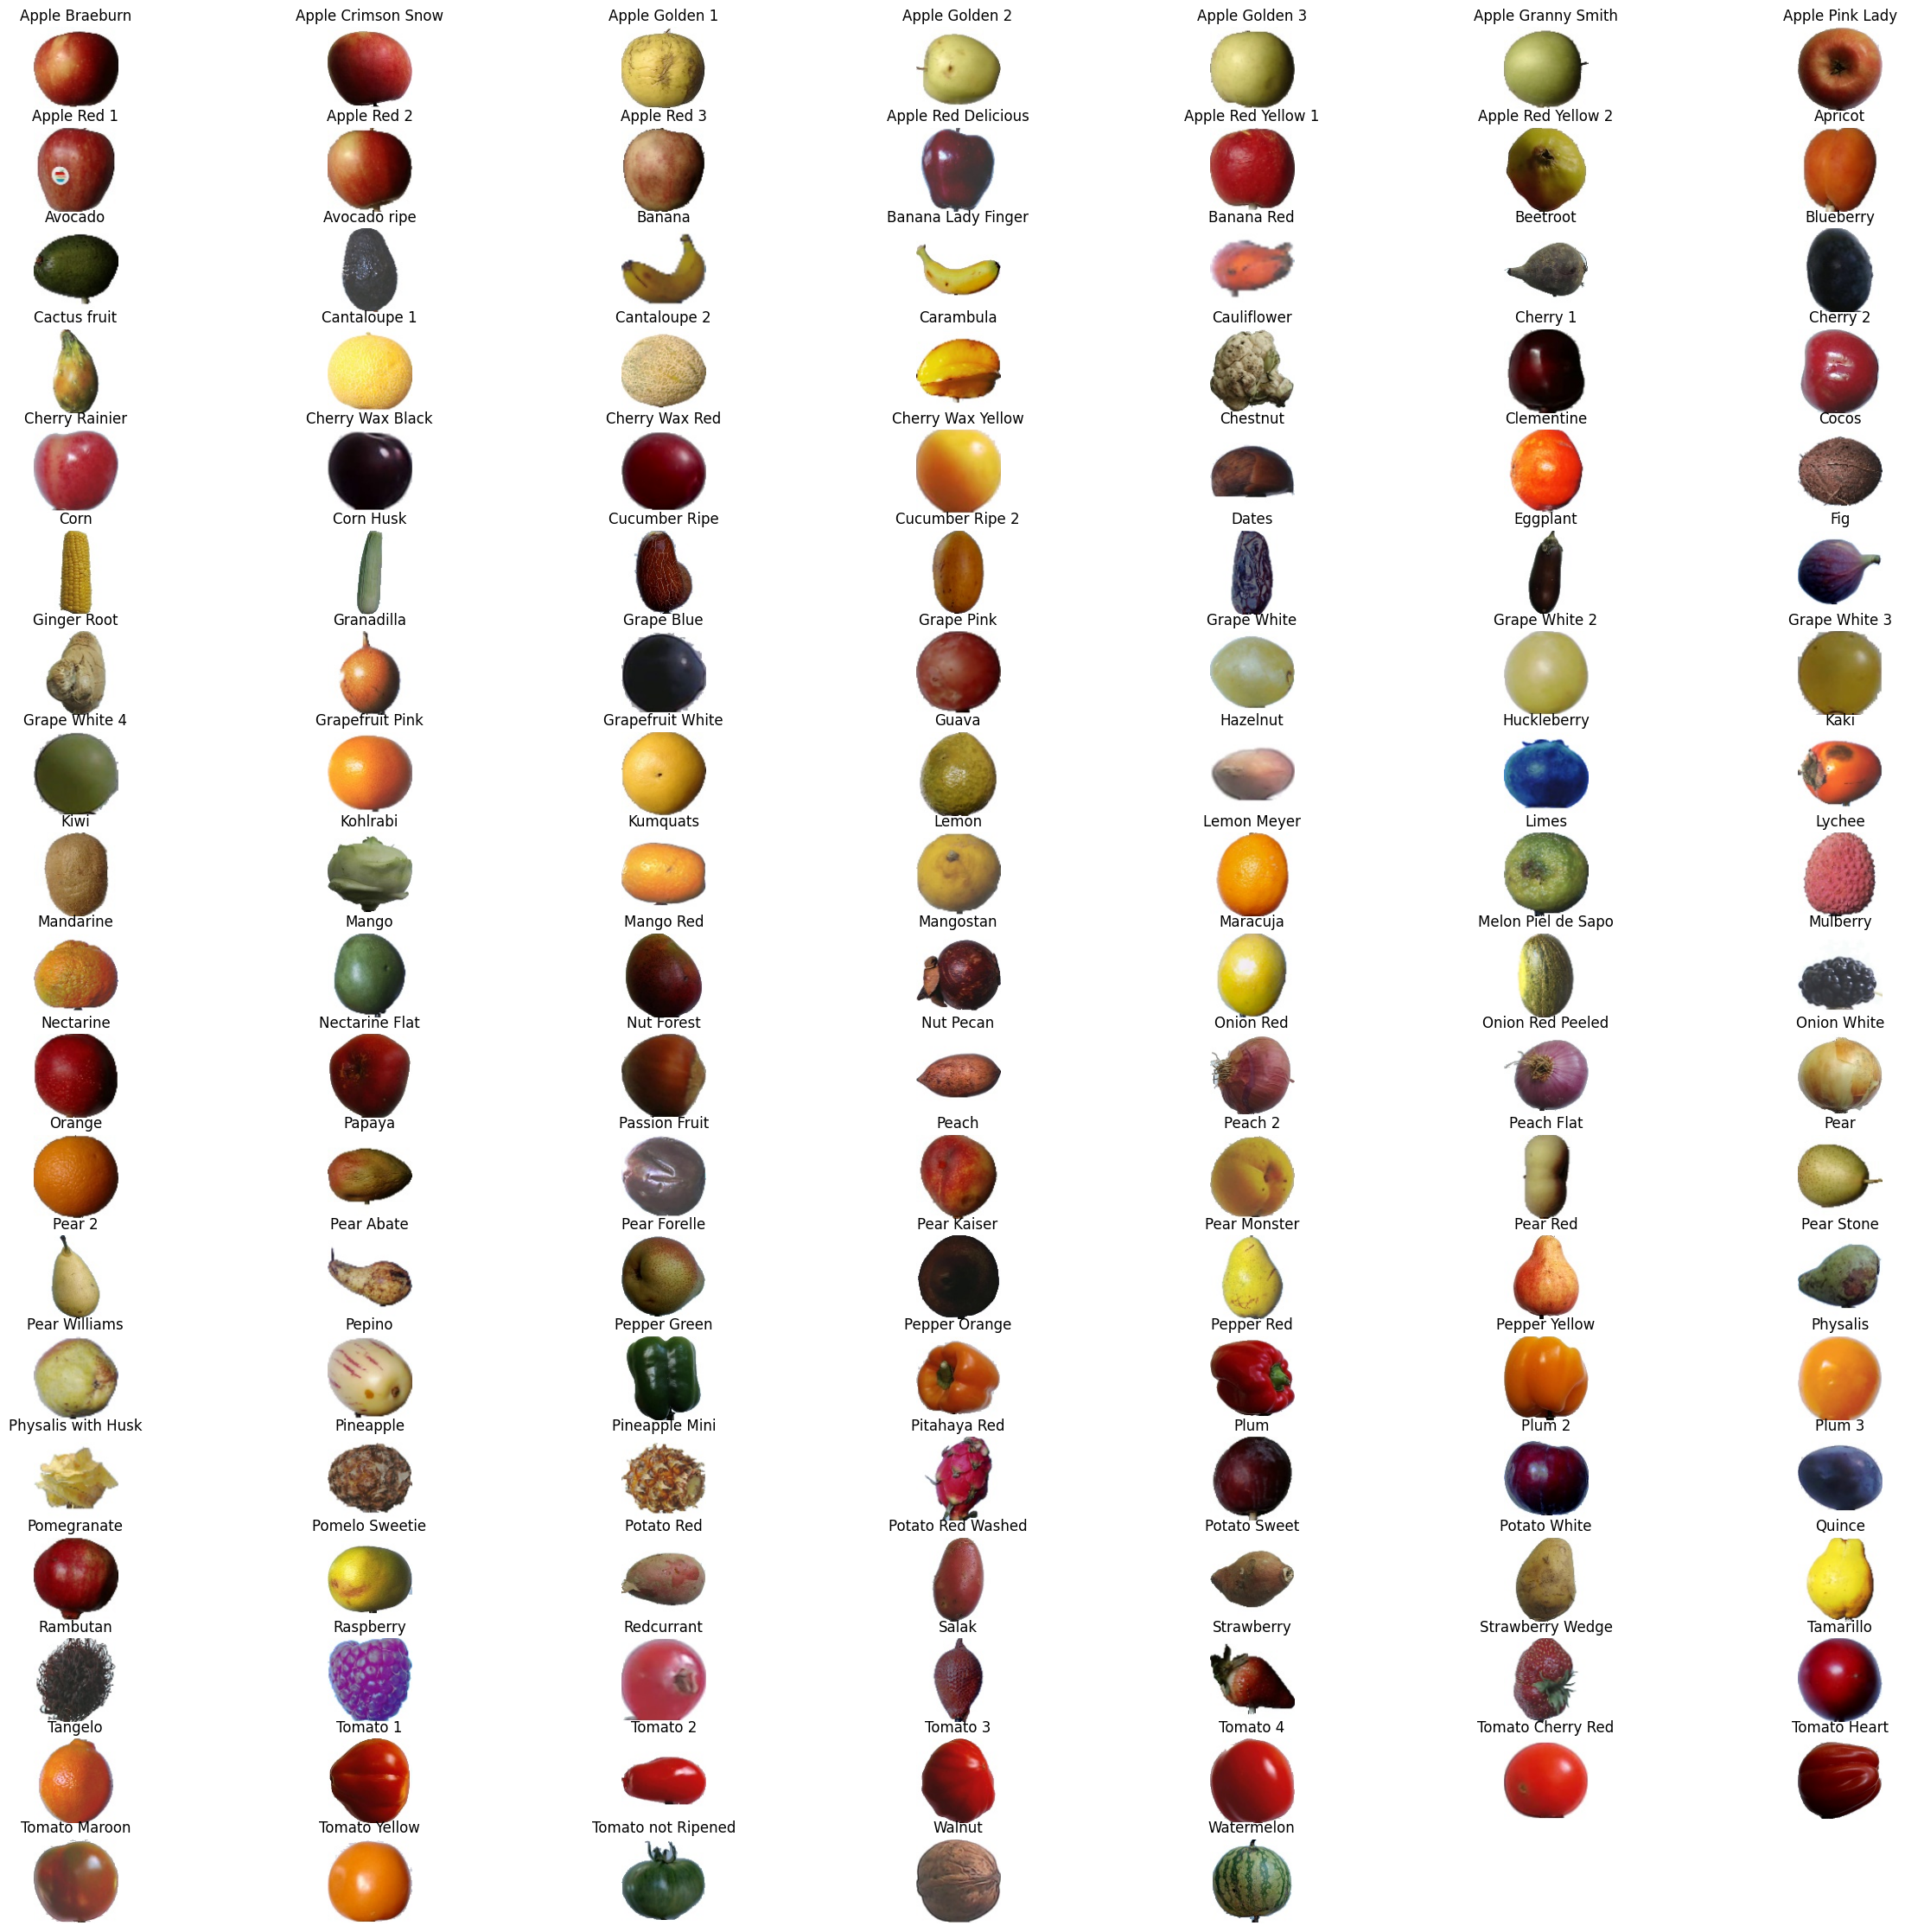

In [35]:
plt.figure(figsize=(30, 30))
for i, class_name in enumerate(class_names):
    img = view_random_image(target_dir=data_dir, target_class=class_name)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
plt.show()

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout

In [38]:
train_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_train,
    target_size=(100, 100),
    batch_size=60,
    classes=classes,
    class_mode='categorical'
)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_val,
    target_size=(100, 100),
    batch_size=75,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_test,
    target_size=(100, 100),
    batch_size=75,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)
train_generator = train_gen
validation_generator = val_gen
test_generator = test_gen

Found 47384 validated image filenames belonging to 131 classes.
Found 20308 validated image filenames belonging to 131 classes.
Found 22688 validated image filenames belonging to 131 classes.


In [39]:
(train_gen.classes)

[71,
 97,
 26,
 122,
 54,
 60,
 84,
 18,
 32,
 62,
 89,
 12,
 120,
 104,
 24,
 76,
 61,
 54,
 25,
 57,
 66,
 75,
 122,
 7,
 112,
 125,
 120,
 105,
 33,
 94,
 92,
 7,
 75,
 64,
 4,
 50,
 13,
 26,
 39,
 1,
 18,
 129,
 60,
 30,
 61,
 103,
 7,
 77,
 40,
 118,
 11,
 47,
 116,
 31,
 71,
 117,
 100,
 102,
 120,
 101,
 91,
 125,
 117,
 24,
 43,
 122,
 129,
 68,
 31,
 18,
 122,
 2,
 80,
 47,
 76,
 117,
 112,
 101,
 75,
 19,
 97,
 120,
 85,
 37,
 74,
 115,
 88,
 75,
 92,
 72,
 113,
 126,
 21,
 111,
 41,
 62,
 123,
 101,
 111,
 85,
 111,
 99,
 84,
 76,
 71,
 120,
 123,
 110,
 101,
 53,
 19,
 51,
 20,
 0,
 87,
 17,
 93,
 60,
 12,
 83,
 12,
 19,
 57,
 47,
 71,
 69,
 90,
 69,
 125,
 84,
 41,
 27,
 87,
 72,
 65,
 43,
 74,
 60,
 9,
 122,
 113,
 97,
 11,
 46,
 89,
 28,
 19,
 84,
 60,
 34,
 54,
 41,
 14,
 99,
 128,
 123,
 129,
 122,
 90,
 115,
 43,
 13,
 126,
 83,
 18,
 104,
 123,
 111,
 13,
 70,
 110,
 123,
 47,
 99,
 18,
 117,
 25,
 21,
 78,
 36,
 77,
 66,
 65,
 25,
 129,
 83,
 122,
 28,
 45,
 44,
 0,

In [40]:
y_test = test_generator.classes
y_test

[13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,


In [41]:
train_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [42]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5) ,
    Dense(131, activation='softmax')
])

In [47]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras import backend as K

In [44]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

In [45]:
metrics = [
    'accuracy',
    Precision(),
    Recall(),
    F1Score()
]

In [48]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=metrics)

model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=60,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/60
10/10 [==============================] - 21s 2s/step - loss: 4.8725 - accuracy: 0.0117 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 4.8265 - val_accuracy: 0.0233 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/60
10/10 [==============================] - 18s 2s/step - loss: 4.7469 - accuracy: 0.0283 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 4.5902 - val_accuracy: 0.0450 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/60
10/10 [==============================] - 21s 2s/step - loss: 4.4593 - accuracy: 0.0633 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 4.1160 - val_accuracy: 0.0733 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/60
10/10 [==============================] - 22s 2s/step - loss: 3.9818 - accuracy: 0.1083 - precision: 0.6923 - recall: 0.0150 -

In [50]:
model.save('model2.keras')

In [51]:
eval_result = model.evaluate(test_generator)

303/303 [==============================] - 151s 495ms/step - loss: 0.3469 - accuracy: 0.9037 - precision: 0.9293 - recall: 0.8914 - f1_score: 0.9100


In [52]:
print("Test Accuracy:", eval_result[1] )
print("Test Loss:", eval_result[0] )
print("Test Precision:", eval_result[2] )
print("Test Recall:", eval_result[1] )
print("Test f1_score:", eval_result[1] )

Test Accuracy: 0.9036935567855835
Test Loss: 0.34686651825904846
Test Precision: 0.9293263554573059
Test Recall: 0.9036935567855835
Test f1_score: 0.9036935567855835


1/1 [==============================] - 0s 66ms/step
Prediction: Avocado


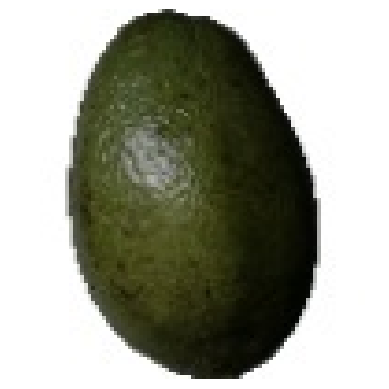

In [65]:
from PIL import Image
from keras.preprocessing.image import img_to_array
def predict_image(img_path, model):
    fruits = train_generator.class_indices
    img = Image.open(img_path)
    img = img.resize((100, 100))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = [k for k, v in fruits.items() if v == predicted_class][0]

    print("Prediction:", predicted_label)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
predict_image('/content/fruits-360_dataset/fruits-360/Test/Avocado/47_100.jpg', model)

In [66]:
def grad_cam_heatmap(image, last_conv_layer_name='last_conv'):

    if model.layers[0].__class__.__name__ == 'Functional':
        last_conv_layer_idx = 0
        last_conv_layer_model = model.layers[0]
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_idx = model.layers.index(last_conv_layer)
        last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)


    classifier_input = tf.keras.Input(shape=last_conv_layer_model.output.shape[1:])
    x = classifier_input
    classifier_layers = model.layers[last_conv_layer_idx+1:]
    for layer in classifier_layers:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)


    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(image)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]
    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]
    heatmap = np.mean(last_conv_layer_output, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

In [67]:
def grad_cam_heatmap(img_path, model, last_conv_layer_name='last_conv'):
    img = cv2.imread(img_path)
    img = np.expand_dims(img, axis=0).astype('float32') / 255.0

    if model.layers[0].__class__.__name__ == 'Functional':
        last_conv_layer_idx = 0
        last_conv_layer_model = model.layers[0]
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_idx = model.layers.index(last_conv_layer)
        last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    classifier_input = tf.keras.Input(shape=last_conv_layer_model.output.shape[1:])
    x = classifier_input
    classifier_layers = model.layers[last_conv_layer_idx+1:]
    for layer in classifier_layers:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(img)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

def grad_cam(img_path, model, last_conv_layer_name='conv2d_2'):
    colors = plt.cm.jet(np.arange(256))[:, :3]
    gc_mask = grad_cam_heatmap(img_path, model, last_conv_layer_name)
    gc_mask_uint8 = (gc_mask*255.0).astype('uint8')
    heatmap = colors[gc_mask_uint8]
    img = cv2.imread(img_path).astype('uint8')
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = (heatmap*255).astype('uint8')
    img_overlay = cv2.addWeighted(src1=img, alpha=0.6, src2=heatmap, beta=0.4, gamma=0.0)

    fig, ax = plt.subplots()
    im = ax.imshow(cv2.cvtColor(img_overlay, cv2.COLOR_BGR2RGB))

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.set_label('Activation')

    plt.show()

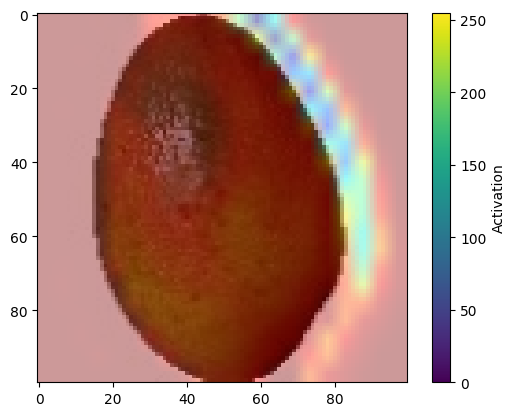

In [68]:
grad_cam('/content/fruits-360_dataset/fruits-360/Test/Avocado/88_100.jpg',model)

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [70]:
def f1_score(y_true, y_pred):
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

In [71]:
y_pred = model.predict(test_generator)

303/303 [==============================] - 159s 521ms/step


In [72]:
y_pred = np.argmax(y_pred, axis=1)

In [73]:
y_pred

array([13, 13, 13, ..., 56, 56, 56])

True Positives (TP): 148
False Positives (FP): 0
True Negatives (TN): 92
False Negatives (FN): 0
Confusion Matrix:
[[ 92   0   0 ...   0   0   0]
 [  0 148   0 ...   0   0   0]
 [  0   0 133 ...   0   0   0]
 ...
 [  0   0   0 ...  96   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]


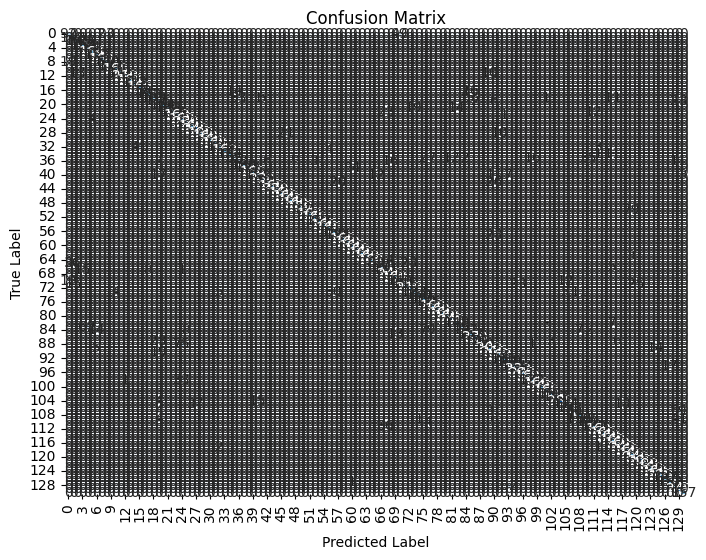

<ipython-input-74-6ca67827e3e5>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=metrics_values, y=metrics_names, palette="viridis")


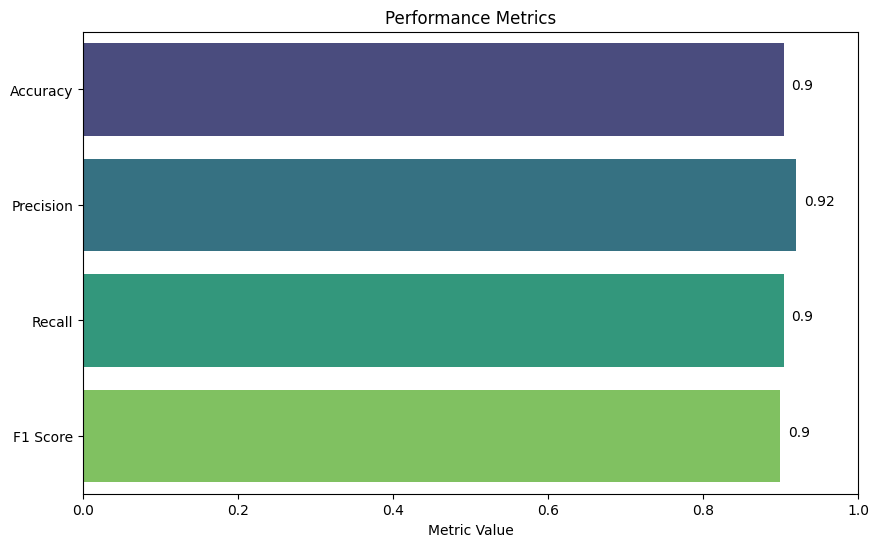

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=metrics_values, y=metrics_names, palette="viridis")
plt.xlabel('Metric Value')
plt.title('Performance Metrics')
plt.xlim(0, 1)
for i, v in enumerate(metrics_values):
    barplot.text(v + 0.01, i, str(round(v, 2)), color='black', ha='left')

plt.show()

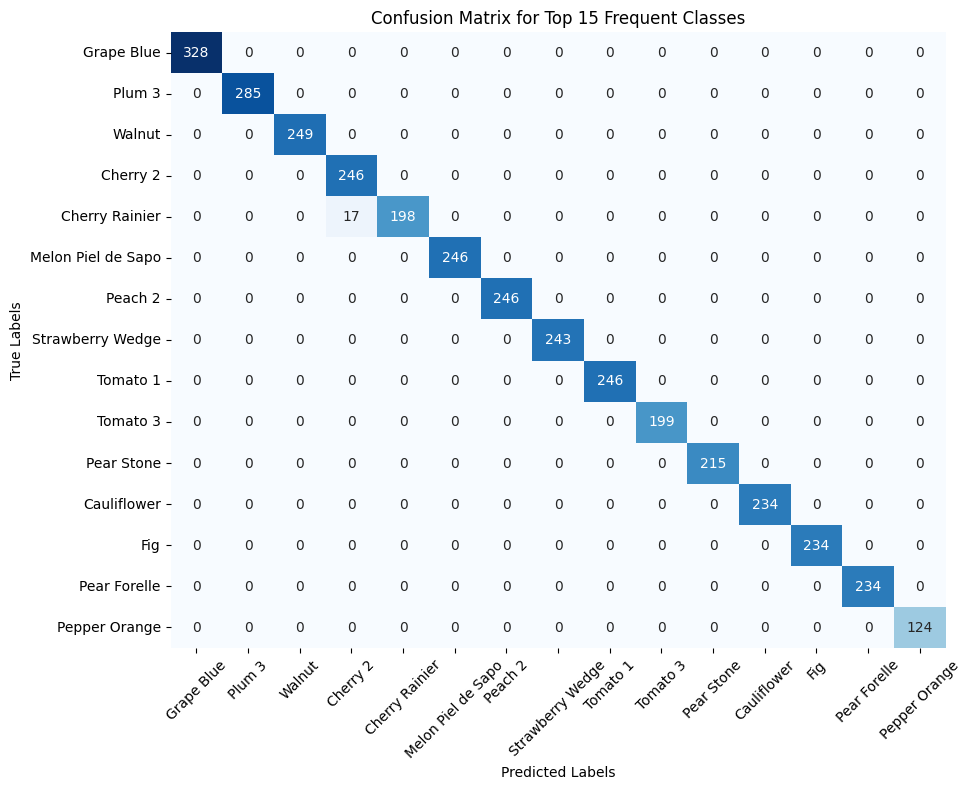

In [75]:
class_freq = {class_label: sum([1 for label in y_test if label == class_label]) for class_label in set(y_test)}
top_ten_classes = sorted(class_freq, key=class_freq.get, reverse=True)[:15]
top_ten_cm = cm[top_ten_classes][:, top_ten_classes]
top_ten_class_names = [class_names[class_label] for class_label in top_ten_classes]
plt.figure(figsize=(10, 8))
sns.heatmap(top_ten_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Top 15 Frequent Classes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(15) + 0.5, labels=top_ten_class_names, rotation=45)
plt.yticks(ticks=np.arange(15) + 0.5, labels=top_ten_class_names, rotation=0)

plt.show()

In [77]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [78]:
import streamlit as st

In [87]:
base = '/content/fruits-360_dataset/fruits-360'
train_dir = os.path.join(base, 'Training')
validation_dir = os.path.join(base, 'Test')
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=60,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=75,
    class_mode='categorical'
)
fruits = train_generator.class_indices
def load_saved_model():
    return load_model('model2.h5')


def preprocess_image(image):
    img = Image.open(image).convert('RGB')
    img = img.resize((100,100))
    img_array = np.array(img) / 255.0
    return img_array.reshape((-1, 100, 100, 3))

def predict(model, image):
    img_array = preprocess_image(image)
    prediction = model.predict(img_array)
    return prediction


# Streamlit app
def main():


    gradient_bg_css = """
        background: linear-gradient(to right, #4C0FB5, #198DD0);
        padding: 20px;
        border-radius: 10px;
        border: 4px solid white; /* Adding a 2px solid white border */
    """
    gradient_bg_css2 = """
        background: linear-gradient(to right, #4C0FB5, #198DD0);
        padding: 4px;
        border-radius: 5px;
        border: 3px solid white; /* Adding a 2px solid white border */
        font-size: 10px;
    """


    title_text = "<h1 style='text-align: center; color: white;'>Fruits Classification Web App</h1>"
    styled_= f"<div style='{gradient_bg_css}'>{title_text}</div>"


    st.write("")
    st.markdown(styled_, unsafe_allow_html=True)
    st.write("")
    st.write("")

    # Upload image
    uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_image is not None:

        image = Image.open(uploaded_image)
        st.image(image, caption='Uploaded Image', use_column_width=True)
        st.markdown(
            """
            <style>
                .center {
                    display: flex;
                    justify-content: center;
                    align-items: center;
                }
                .main {
                    text-align: center;
                }
                h3{
                    font-size: 25px
                }
                .st-emotion-cache-16txtl3 h1 {
                font: bold 29px arial;
                text-align: center;
                margin-bottom: 15px

                }
                div[data-testid=stSidebarContent] {
                background-color: #111;
                border-right: 4px solid white;
                padding: 8px!important

                }

                div.block-containers{
                    padding-top: 0.7rem
                }

                .st-emotion-cache-z5fcl4{
                    padding-top: 5rem;
                    padding-bottom: 1rem;
                    padding-left: 1.1rem;
                    padding-right: 2.2rem;
                    overflow-x: hidden;
                }

                .st-emotion-cache-16txtl3{
                    padding: 2.7rem 0.6rem
                }

                .plot-container.plotly{
                    border: 0px solid white;
                    border-radius: 6px;
                }

                div.st-emotion-cache-1r6slb0 span.st-emotion-cache-10trblm{
                    font: bold 24px tahoma
                }
                div [data-testid=stImage]{
                    text-align: center;
                    display: block;
                    margin-left: auto;
                    margin-right: auto;
                    width: 100%;
                }

                div[data-baseweb=select]>div{
                    cursor: pointer;
                    background-color: #111;
                    border: 0px solid white;
                }
                div[data-baseweb=select]>div:hover{
                    border: 0px solid white

                }
                div[data-baseweb=base-input]{
                    background-color: #111;
                    border: 0px solid white;
                    border-radius: 5px;
                    padding: 5px
                }

                div[data-testid=stFormSubmitButton]> button{
                    width: 20%;
                    background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%);
                    border: 3px solid white;
                    padding: 18px;
                    border-radius: 30px;
                    opacity: 0.8;
                }
                div[data-testid=stFormSubmitButton]  p{
                    font-weight: bold;
                    font-size : 20px
                }

                div[data-testid=stFormSubmitButton]> button:hover{
                    opacity: 3;
                    border: 2px solid white;
                    color: white
                }

            </style>
            """,
                unsafe_allow_html=True
            )
        st.write("")
        with st.form('form'):
            btn = st.form_submit_button('predict')
        if btn:
            st.write("")
            st.write("")
            st.write("")
            model = load_saved_model()
            prediction = predict(model, uploaded_image)
            top_5_indices = np.argsort(prediction[0])[::-1][:5]
            top_5_probs = prediction[0][top_5_indices]
            table_data = {'Class': [], 'Probability': []}
            for i in range(5):
                result = [k for k, v in fruits.items() if v == top_5_indices[i]][0]
                table_data['Class'].append(result)
                table_data['Probability'].append(top_5_probs[i])
            title_text = "<h3 style='text-align: center; color: white;'>Top 5 Predictions:</h3>"
            styled_title = f"<div style='{gradient_bg_css2}'>{title_text}</div>"
            st.write("")
            st.write("")
            st.write("")
            st.markdown(styled_title, unsafe_allow_html=True)
            table_style = "<style>th {background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); color: white;}</style>"
            st.write(table_style, unsafe_allow_html=True)
            st.write("")
            st.table(table_data)
            predicted_class = np.argmax(prediction)
            predicted_label = [k for k, v in fruits.items() if v == predicted_class][0]
            prediction_css = """
            background-color: white;
            color: blue;
            border: 2px solid blue;
            border-radius: 5px;
            padding: 10px;
            text-align: center;
            """
            st.write("")
            st.write("")
            st.markdown(
                f'<h3 style="{prediction_css}">Prediction:</h3>',
                unsafe_allow_html=True
            )
            st.write("")
            st.write("")
            st.write("")
            markdown_text = f'<spin style="color:lightgray;background:#575860;font-size:30px;border: 2px solid lightgray; padding: 10px;">{predicted_label}</spin>'
            st.markdown(markdown_text,unsafe_allow_html=True)

if __name__ == '__main__':
    main()

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
